In [1]:
import librosa
import os
import IPython.display as lpd
import numpy as np
import matplotlib.pyplot as plt
import pickle
import copy

In [56]:
import pandas as pd

#get specific call files with excel
data_path = './asset/birdclef-2021/train_short_audio/'

df = pd.read_csv('./asset/birdclef-2021/train_metadata.csv')
print(len(df))
df = df.drop(df[df.secondary_labels != '[]'].index)
print(len(df))
blist=df['primary_label'].unique()

num_count = 1
call_dic=dict()
for bird,filename in zip(df['primary_label'],df['filename']):
    if not bird in call_dic.keys():
        call_dic[bird] = [os.path.join(data_path,bird,filename)]
    else:
        if len(call_dic[bird]) >= num_count:
            continue
        else:
            call_dic[bird].append(os.path.join(data_path,bird,filename))
sum([len(call_dic[i]) for i in call_dic])

62874
41358


397

In [38]:

#get list of all files with labels
data_path = './asset/birdclef-2021/train_short_audio/'

df = pd.read_csv('./asset/birdclef-2021/train_metadata.csv')

num_count = 1
call_list=list()
for sec,pri,filename in zip(df['secondary_labels'],df['primary_label'],df['filename']):
    sec_2 = list(sec.replace("'",'').replace('[','').replace(']','').split(','))
    sec_2.append(pri)
    if sec_2[0]=='':
        sec_2=sec_2[1:]
    call_list.append([os.path.join(data_path,pri,filename),sec_2])
len(call_list)



62874

In [17]:
#get all files under data_root_folder
data_path = './asset/birdclef-2021/train_short_audio/'

birds_list = [ bird for bird in os.listdir(data_path) if os.path.isdir(os.path.join(data_path,bird))]

num_count = 5000
call_dic = dict()
minimum = 10000
for bird in birds_list:
    bird_path = os.path.join(data_path,bird)
    call_list = [ call for call in os.listdir(bird_path) if call.split('.')[-1]=='ogg']
    if len(call_list) < minimum: minimum=len(call_list)
    if not bird in call_dic.keys():
        call_dic[bird] = []
    for call in call_list:
        call_path = os.path.join(bird_path,call)
        if len(call_dic[bird]) < num_count:
            call_dic[bird].append(call_path)
        else:
            break

In [40]:
def get_call_window(wav,duration=32000*5,mode='precise'):
    #Todo : implementing get multiple windows option would be needed
    
    if not mode in ['precise','fast']:
        raise ValueError('get_call_window mode parameter allow "precise" and "fast"')
    
    mean = sum(np.abs(wav))/len(wav)
    call = None
    silence = None
    for i in range(0,len(wav),32000):
        if i+duration > len(wav):
            break
        if sum(np.abs(wav[i:i+duration]))/duration > mean:
            if call is None: call = wav[i:i+duration]
            else:
                if sum(np.abs(call))/duration < sum(np.abs(wav[i:i+duration]))/duration:
                    call = wav[i:i+duration]
        else:
            if silence is None: silence = wav[i:i+duration]
            else:
                if sum(np.abs(silence))/duration > sum(np.abs(wav[i:i+duration]))/duration:
                    silence = wav[i:i+duration]
        if mode == 'fast' and (call is not None and silence is not None):
            return call, silence
    return call,silence

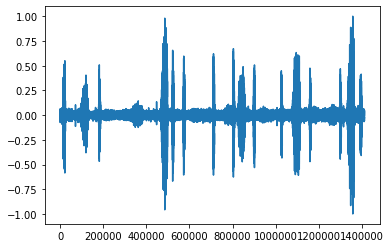

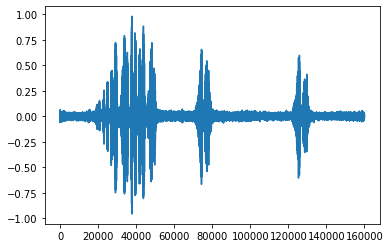

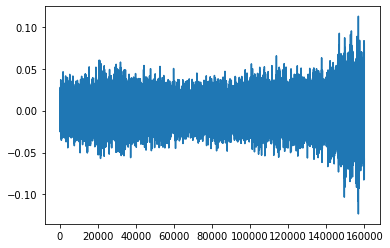

In [112]:
test,_ = librosa.load(call_dic['aldfly'][5])
test = librosa.util.normalize(test)

lpd.display(lpd.Audio(test,rate=32000))
call,silence = get_call_window(test,mode='precise')
lpd.display(lpd.Audio(call,rate=32000))
lpd.display(lpd.Audio(silence,rate=32000))
plt.plot(test)
plt.show()
plt.plot(call)
plt.show()
plt.plot(silence)
plt.show()

In [41]:
import copy

pickle_dic = copy.deepcopy(call_dic)

for i in pickle_dic:
    print(i)
    for j,path in enumerate(pickle_dic[i]):
        wav, _ =librosa.load(path,sr=32000)
        wav = librosa.util.normalize(wav)
        call, silence = get_call_window(wav,mode='fast')
        pickle_dic[i][j] = [call,silence]

In [3]:
'''
with open('./asset/birds_fast.pickle','wb') as f:
    pickle.dump(pickle_dic,f)
'''
with open('./asset/birds_fast.pickle','rb') as f:
    pickle_dic = pickle.load(f)

In [4]:
mel_dic = copy.deepcopy(pickle_dic)

def convert_to_mel(wav):
    SPEC_HEIGHT = 64
    SPEC_WIDTH = 256
    NUM_MELS = SPEC_HEIGHT
    HOP_LENGTH = int(32000 * 5 / (SPEC_WIDTH - 1)) # sample rate * duration / spec width - 1 == 627
    FMIN = 500
    FMAX = 12500
    mel_spec = librosa.feature.melspectrogram(y=wav, 
                                              sr=32000, 
                                              n_fft=1024, 
                                              hop_length=HOP_LENGTH, 
                                              n_mels=NUM_MELS, 
                                              fmin=FMIN, 
                                              fmax=FMAX)
    mel_spec_db = librosa.power_to_db(mel_spec, ref=np.max)
    mel_spec -= mel_spec.min()
    mel_spec /= mel_spec.max()
    return mel_spec

for i in mel_dic:
    print(i)
    for j,wav in enumerate(mel_dic[i]):
        if not wav[0] is None: 
            mel_dic[i][j][0] = convert_to_mel(wav[0])
        if not wav[1] is None: 
            mel_dic[i][j][1] = convert_to_mel(wav[1])

acafly
acowoo
aldfly
ameavo
amecro
amegfi
amekes
amepip
amered
amerob
amewig
amtspa
andsol1
annhum
astfly
azaspi1
babwar
baleag
balori
banana
banswa
banwre1
barant1
barswa
batpig1
bawswa1
bawwar
baywre1
bbwduc
bcnher
belkin1
belvir
bewwre
bkbmag1
bkbplo
bkbwar
bkcchi
bkhgro
bkmtou1
bknsti
blbgra1
blbthr1
blcjay1
blctan1
blhpar1
blkpho
blsspa1
blugrb1
blujay
bncfly
bnhcow
bobfly1
bongul
botgra
brbmot1
brbsol1
brcvir1
brebla
brncre
brnjay
brnthr
brratt1
brwhaw
brwpar1
btbwar
btnwar
btywar
bucmot2
buggna
bugtan
buhvir
bulori
burwar1
bushti
butsal1
buwtea
cacgoo1
cacwre
calqua
caltow
cangoo
canwar
carchi
carwre
casfin
caskin
caster1
casvir
categr
ccbfin
cedwax
chbant1
chbchi
chbwre1
chcant2
chispa
chswar
cinfly2
clanut
clcrob
cliswa
cobtan1
cocwoo1
cogdov
colcha1
coltro1
comgol
comgra
comloo
commer
compau
compot1
comrav
comyel
coohaw
cotfly1
cowscj1
cregua1
creoro1
crfpar
cubthr
daejun
dowwoo
ducfly
dusfly
easblu
easkin
easmea
easpho
eastow
eawpew
eletro
eucdov
eursta
fepowl
fiespa
flrtan1

In [5]:
silence = pickle_dic['plupig2'][0][1]
lpd.display(lpd.Audio(silence,rate=32000))
call = pickle_dic['plupig2'][0][0]
lpd.display(lpd.Audio(call,rate=32000))

In [4]:
import librosa
import os
import IPython.display as lpd
import numpy as np
import matplotlib.pyplot as plt
import pickle
import copy

'''
with open('./asset/birds_fast_mel.pickle','wb') as f:
    pickle.dump(mel_dic,f)
'''
with open('./asset/birds_fast_mel.pickle','rb') as f:
    mel_dic = pickle.load(f)


In [5]:
import torch.nn.functional as F
import torch
import random

ind2bird = [i for i in mel_dic.keys()]
ind2bird.append('nocall')
bird2ind = dict()

for i,bird in enumerate(ind2bird):
    bird2ind[bird] = i

dataset = []
nocall_ratio = 0.1
num_nocall = int(len(ind2bird)*nocall_ratio)
nocall_cnt = 0
for i in mel_dic:
    for j,data in enumerate(mel_dic[i]):
        if not data[0] is None:
            dataset.append([data[0],torch.tensor(bird2ind[i])])
        if (not data[1] is None) and (nocall_cnt < num_nocall):
            dataset.append([data[1],torch.tensor(bird2ind[i])])
            nocall_cnt += 1
random.shuffle(dataset)

In [10]:
from modules.ResNet import resnet50
import torch.optim as optim
from IPython.display import display

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

model = resnet50(num_classes = len(ind2bird))
model.to(device)
model.train()

class Averager(object):
    """Compute average for torch.Tensor, used for loss average."""

    def __init__(self):
        self.reset()

    def add(self, v):
        count = v.data.numel()
        v = v.data.sum()
        self.n_count += count
        self.sum += v

    def reset(self):
        self.n_count = 0
        self.sum = 0

    def val(self):
        res = 0
        if self.n_count != 0:
            res = self.sum / float(self.n_count)
        return res
    
def get_batch(dataset,cur,batch_size):
    call = np.concatenate([data[0][np.newaxis,np.newaxis,:,:] for data in dataset[cur:cur+batch_size]])
    lbl = np.concatenate([torch.reshape(data[1],(1,1)) for data in dataset[cur:cur+batch_size]])
    call = torch.from_numpy(call).to(device)
    lbl = torch.from_numpy(lbl).to(device)
    
    return call,lbl

loss_avg = Averager()
criterion = torch.nn.CrossEntropyLoss().to(device)

filtered_parameters = []
params_num = []
for p in filter(lambda p: p.requires_grad, model.parameters()):
    filtered_parameters.append(p)
    params_num.append(np.prod(p.size()))
print('Trainable params num : ', sum(params_num))

learning_rate=0.0003
optimizer = optim.Adam(filtered_parameters, lr=learning_rate, betas=(0.9, 0.999))
batch_size = 10
epochs = 1
df = display('go',display_id=True)
for epoch in range(epochs):
    for batch in range(len(dataset)//batch_size):
        
        call, lbl = get_batch(dataset,batch,batch_size)
        #test_data = np.concatenate([data[0][np.newaxis,np.newaxis,:,:] for data in dataset[:batch_size]])
        preds = model(call)
        cost = criterion(preds.contiguous().view(-1, preds.shape[-1]), lbl.contiguous().view(-1))
        
        loss_avg.add(cost)
        
        model.zero_grad()
        cost.backward()
        torch.nn.utils.clip_grad_norm_(model.parameters(),5)  # gradient clipping with 5 (Default)
        #https://kh-kim.gitbook.io/natural-language-processing-with-pytorch/00-cover-6/05-gradient-clipping
        optimizer.step()
        df.update(f'epoch : {epoch} / batch : {batch} / loss : {loss_avg.val().item()}')
        
        del call, lbl, preds, cost

Trainable params num :  24317262


'epoch : 0 / batch : 42 / loss : 4.518606185913086'